<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mc

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The sales manager at an electronics company wants to study if online sales of their products in 2019 follow the same distribution as the online sales of products in 2015. He collected the sample of 300 products sold in 2019. Help the manager to test his claim using p-value technique at a 99% confidence level.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<img src='chi_2.png'>

In [1]:
# type your code here
#Hypothesis
#H0: obs = exp
#Ha: obs != exp

In [3]:
exp_per = np.array([0.38, 0.20, 0.42])
n = 300
exp_val = exp_per * n
obs_val = [85,90,125]

In [4]:
stats.chisquare(f_obs = obs_val, f_exp = exp_val)

Power_divergenceResult(statistic=22.38512949039265, pvalue=1.3776246111575923e-05)

In [ ]:
#pval = 0.000013
#sig lvl = 0.01
#pval < sig lvl
#Reject H0
#obs != exp
#Sales of product are different in 2019 compared to 2015

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Use hypothesis testing to check if the type of car is dependent on the type of car's transmission. Plot the acceptance and rejection region to test the hypothesis with 95% confidence.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<img src='chi_ind.png'>

In [16]:
# type your code here
#Hypothesis
#H0: both columns are independent
#Ha: both columns are dependent
df = (2-1)*(3-1)
val = np.array([104,85,78,35,61,72])
obs_val = val.reshape(2,3)
obs_val

array([[104,  85,  78],
       [ 35,  61,  72]])

In [9]:
stats.chi2_contingency(obs_val, correction = False)

(16.774829953535356,
 0.00022771516717561853,
 2,
 array([[85.31724138, 89.6137931 , 92.06896552],
        [53.68275862, 56.3862069 , 57.93103448]]))

In [7]:
#pval = 0.00022
#sig lvl = 0.05
#pval < sig lvl
#Reject H0
#type of car is dependent on the type of car's transmission

array([[85.31724138, 89.6137931 , 92.06896552],
       [53.68275862, 56.3862069 , 57.93103448]])

In [25]:
#Plotting acceptance and rejection regions
z = stats.chi2.isf(0.05, df =2)

#Any value greater than 5.99 falls in acceptance region
#from the test chi2 test value is
chi2_test = 16.77
z

5.991464547107983

C:\Users\aravrao\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
<ipython-input-34-f0bf890584b1>:16: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = 'χ2_crit = '+str(z)+", acceptance region", xy = (z, 0.0002277), xytext = (z+1, 0.1),


Text(6.991464547107983, 0.1, 'χ2_crit = 5.991464547107983, acceptance region')

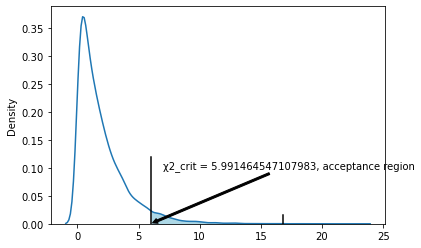

In [34]:
X = stats.chi2.rvs(df = 2, size = 10000, random_state = 10)
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))
# plot a vertical line at χ2-value
x, y = [z, z], [0, 0.12]
plt.plot(x, y, color = 'black')

# add the color to the right of the χ2-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')
plt.annotate(s = 'χ2_crit = '+str(z)+", acceptance region", xy = (z, 0.0002277), xytext = (z+1, 0.1), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. The researcher recorded ph of 10 samples of sodium hydroxide solution with an average ph of 8.3. He wants the variance of ph to be less than 1.2. Use the critical value method to test whether the variance is less than 1.2 at a 10% level of significance.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given data

         ph = [8.24, 8.41, 8.35, 7.96, 8.48, 8.45, 8.66, 8.15, 7.98, 8.33]

In [12]:
# type your code here
ph = [8.24, 8.41, 8.35, 7.96, 8.48, 8.45, 8.66, 8.15, 7.98, 8.33]
#Hypothesis
#H0: variance >= 1.2
#Ha: variance < 1.2
n = len(ph)
v = np.std(ph, ddof = 1)
sigma = 1.2
chi_2 = ((n-1)*(v**2))/(sigma**2)
pval =stats.chi2.cdf(chi_2,df=n-1)
pval


3.7395924978199177e-06

In [13]:
#pval = 0.000003
#since pval< sig lvl reject H0
#variance < 1.2

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. A company produces leather belts on three different production lines. The number of defective belts produced by each line is recorded. Test if all the production lines produce on an average equal number of defective belts. Use the p-value technique to test at 5% level of significance.  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the data given in the excel file `defective_prod.xlsx`

In [4]:
# type your code here
df = pd.read_excel("defective_prod.xlsx")
df

,production_line,def_belts
0,A,5
1,C,2
2,B,3
3,A,4
4,C,1
5,A,6
6,B,3
7,C,2
8,A,4
9,B,8


In [5]:
belt_1 = df[df["production_line"] == "A"]["def_belts"]
belt_2 = df[df["production_line"] == "B"]["def_belts"]
belt_3 = df[df["production_line"] == "C"]["def_belts"]


In [6]:
#Checking for normality
stats.shapiro(belt_1)

ShapiroResult(statistic=0.8557514548301697, pvalue=0.1386316567659378)

In [7]:
stats.shapiro(belt_2)

ShapiroResult(statistic=0.8036767840385437, pvalue=0.04453404247760773)

In [8]:
stats.shapiro(belt_3)

ShapiroResult(statistic=0.8339223861694336, pvalue=0.08714758604764938)

In [10]:
stats.levene(belt_1, belt_2, belt_3)

LeveneResult(statistic=0.8375, pvalue=0.4489726403784061)

In [ ]:
#H0: all defective means are same
#Ha: atleast one defective mean is different

In [11]:
stats.f_oneway(belt_1, belt_2, belt_3)

F_onewayResult(statistic=0.8384615384615386, pvalue=0.44857788134106824)

In [ ]:
#pval = 0.44
#pval > 0.05
#Fail to reject H0
#All defective means are same

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. The company wants to decide their advertisement strategies for their new smartwatch. The manager collects the advertising cost (in dollars) for four different mediums. Test if the company is spending on average an equal amount on all the advertising mediums using a critical value approach with 99% confidence.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the data given in the excel file `ad_cost.xlsx`

In [2]:
# type your code here
df = pd.read_excel("ad_cost.xlsx")
df

,medium,cost
0,Snapmart,252
1,Picbook,378
2,Funsta,312
3,Klicker,297
4,Picbook,361
5,Snapmart,274
6,Klicker,352
7,Picbook,343
8,Funsta,320
9,Snapmart,242


In [3]:
df["medium"].value_counts()

Snapmart    3
Picbook     3
Klicker     3
Funsta      3
Name: medium, dtype: int64

In [16]:
med_1 = df[df["medium"] == "Funsta" ]["cost"]
med_2 = df[df["medium"] == "Snapmart" ]["cost"]
med_3 = df[df["medium"] == "Klicker" ]["cost"]
med_4 = df[df["medium"] == "Picbook" ]["cost"]
print(len(med_1), len(med_2), len(med_3), len(med_4))

3 3 3 3


In [5]:
#checking for normality
stats.shapiro(med_1)

ShapiroResult(statistic=0.9825580716133118, pvalue=0.7470288276672363)

In [6]:
stats.shapiro(med_2)

ShapiroResult(statistic=0.9552238583564758, pvalue=0.5927872061729431)

In [7]:
stats.shapiro(med_3)

ShapiroResult(statistic=0.8564552068710327, pvalue=0.2578691840171814)

In [8]:
stats.shapiro(med_4)

ShapiroResult(statistic=0.9997281432151794, pvalue=0.9685051441192627)

In [9]:
#All pval > 0.05
#Fail to reject H0
#Data is normal

#Checking for variance
#H0: variance = same
#Ha: variance != same
stats.levene(med_1, med_2, med_3, med_4)

LeveneResult(statistic=0.4517895809451025, pvalue=0.723091337608583)

In [10]:
#pval > 0.05
#variance = same

In [11]:
#Hypothesis
#H0: all 4 mediums have equal mean
#Ha: atleast one medium's mean is different

stats.f_oneway(med_1, med_2, med_3, med_4)

F_onewayResult(statistic=14.880471006443026, pvalue=0.001230153853232096)

In [12]:
#pval = 0.0012
#sig lvl = 0.01
#pval < sig lvl
#Reject H0
#Atleast one medium's mean is different

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. The output of the previous question shows that the average cost for at least one advertising medium is different. Now find the advertising medium that has a different average with 99% confidence. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the data given in the excel file `ad_cost.xlsx`

In [27]:
print(med_1, med_2,med_3, med_4)

2     312
8     320
11    325
Name: cost, dtype: int64 0    252
5    274
9    242
Name: cost, dtype: int64 3     297
6     352
10    305
Name: cost, dtype: int64 1    378
4    361
7    343
Name: cost, dtype: int64


In [21]:
# type your code here
df_ad = pd.DataFrame(data = {"medium" : ["Funsta","Funsta","Funsta", "Snapmart","Snapmart","Snapmart",
                                         "Klicker","Klicker","Klicker", "Picbook","Picbook","Picbook"],
                            "cost": [312,320,325,252,274,242,297,352,305,378,361,343]})

In [28]:
# perform tukey's range test to compare the mean efficiency for pair of machines
# pass the tensile strength to the parameter, 'data'
# pass the name of the machine to the parameter, 'groups'
comp = mc.MultiComparison(data = df_ad['cost'], groups = df_ad['medium'])

# tukey's range test
post_hoc = comp.tukeyhsd()

# print the summary table
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Funsta,Klicker,-1.0,0.9,-51.6444,49.6444,False
Funsta,Picbook,41.6667,0.1114,-8.9778,92.3111,False
Funsta,Snapmart,-63.0,0.017,-113.6444,-12.3556,True
Klicker,Picbook,42.6667,0.1019,-7.9778,93.3111,False
Klicker,Snapmart,-62.0,0.0185,-112.6444,-11.3556,True
Picbook,Snapmart,-104.6667,0.001,-155.3111,-54.0222,True


In [29]:
#reject = False for Funsta-Klicker, Funsta-Picbook, Klicker-Picbook state that we fail to reject null hypothesis, which tells
#the average cost for these pairs is same, and for the rest of the pairs the cost is not same

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. A company produces leather belts on three different production lines. The number of defective belts produced by each line is recorded. Test if all the production lines produce on an average equal number of defective belts. Use critical value technique to test at a 1% level of significance.  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the data given in the excel file `defective_belts.xlsx`

In [30]:
# type your code here
df = pd.read_excel("defective_belts.xlsx")
df

,production_line,def_belts
0,A,5
1,C,2
2,B,3
3,A,4
4,C,1
5,A,6
6,B,3
7,C,2
8,A,4
9,B,8


In [31]:
belt_1 = df[df["production_line"] == "A"]["def_belts"]
belt_2 = df[df["production_line"] == "B"]["def_belts"]
belt_3 = df[df["production_line"] == "C"]["def_belts"]

In [32]:
#Checking for normality
stats.shapiro(belt_1)

ShapiroResult(statistic=0.8557514548301697, pvalue=0.1386316567659378)

In [33]:
stats.shapiro(belt_2)

ShapiroResult(statistic=0.7949341535568237, pvalue=0.036486368626356125)

In [34]:
#pval <0.05, data is not normal
#We cannot use f_oneway
#Using Kruskal_Wallis H test

In [35]:
stats.shapiro(belt_3)

ShapiroResult(statistic=0.8339223861694336, pvalue=0.08714758604764938)

In [36]:
#Checking for equal variance
stats.levene(belt_1, belt_2, belt_3)

LeveneResult(statistic=0.9396551724137933, pvalue=0.40911059075772493)

In [37]:
#Hypothesis
#H0: all 3 belts have equal mean
#Ha: atleast one belt's mean is different

In [39]:
test_stat, p_val = stats.kruskal(belt_1, belt_2, belt_3)
print('Test statistic:', test_stat)
print('p-value:', p_val)

Test statistic: 3.113625648279124
p-value: 0.21080688023964614


In [ ]:
#pval = 0.21
#sig lvl = 0.01
#pval > sig lvl
#Fail to reject H0
#All means are same

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. The store manager wants to study the sales of a product due to advertising it on different online sites. He collects the sales (in dollars) after advertising on four different sites. Use the p-value technique to decide if there is any difference in sales due to different sites. Use a 5% level of significance.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the data given in the excel file `sales.xlsx`

In [4]:
# type your code here
df = pd.read_excel("sales.xlsx")
df

,site,sales
0,Snapmart,252
1,Picbook,398
2,Funsta,212
3,Klicker,227
4,Picbook,381
5,Snapmart,225
6,Klicker,352
7,Picbook,363
8,Funsta,370
9,Snapmart,262


In [6]:
df["site"].value_counts()

Picbook     3
Klicker     3
Funsta      3
Snapmart    3
Name: site, dtype: int64

In [8]:
site1 = df[df["site"] == "Picbook"]['sales']
site2 = df[df["site"] == "Klicker"]['sales']
site3 = df[df["site"] == "Funsta"]['sales']
site4 = df[df["site"] == "Snapmart"]['sales']

In [9]:
#Checking for normality
stats.shapiro(site1)

ShapiroResult(statistic=0.9997279644012451, pvalue=0.9684983491897583)

In [10]:
stats.shapiro(site2)

ShapiroResult(statistic=0.85936439037323, pvalue=0.26582589745521545)

In [11]:
stats.shapiro(site3)

ShapiroResult(statistic=0.8205003142356873, pvalue=0.16444018483161926)

In [12]:
stats.shapiro(site4)

ShapiroResult(statistic=0.9342581629753113, pvalue=0.5047770738601685)

In [ ]:
#pval of all 4 sites > 0.05
#Fail to reject H0
#data is normal

In [13]:
#Checking for variance
#H0: the variance is same
#Ha: variance is not same
stats.levene(site1, site2, site3, site4)

LeveneResult(statistic=0.5550365349779159, pvalue=0.6591446080610521)

In [ ]:
#pval = 0.659
#pval > 0.05
#Fail to reject H0
#Variance is same

In [ ]:
#H0: there is no difference -- all means are same
#Ha: atleast one mean is different

In [14]:
stats.f_oneway(site1, site2, site3, site4)

F_onewayResult(statistic=3.0303002563163672, pvalue=0.09327265423191325)

In [ ]:
#pval = 0.09
#sig lvl = 0.05
#pval > sig lvl
#Fail to reject H0
#All means are same. There is no difference

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. A production house wants to know the impact of movie trailers on social media platforms. The rating out of 5 is collected for four different genres posted on three different platforms. Test the effect of social media platform and genre on the ratings using p-value technique. Use a 5% level of significance.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the data given in the excel file `2way_movie.xlsx`

In [35]:
# type your code here
df = pd.read_excel("2way_movie.xlsx")
df

,platform,genre,rating
0,Funsta,Comedy,2.52
1,Picbook,Horror,3.80
2,Funsta,Romance,3.12
3,Klicker,Horror,3.17
4,Picbook,Comedy,3.61
5,Klicker,Romance,4.50
6,Klicker,Comedy,3.52
7,Picbook,Sci-Fi,3.43
8,Funsta,Horror,4.20
9,Picbook,Romance,4.80


In [ ]:
#Hypothesis 1
#H0: The effect of all 3 platforms is same
#Ha: Atleast one effect of 3 platforms is not same

#Hypothesis 2
#H0: The effect of all 4 genres is same
#Ha: Atleast one effect of 4 genres is not same


In [37]:
#Checking for normality of ratings data
stats.shapiro(df["rating"])

ShapiroResult(statistic=0.9772306680679321, pvalue=0.9701549410820007)

In [ ]:
#pval =0.97 >0.05
#Fail to reject H0 --> Data is normal

In [ ]:
len_plat = 3
len_genre = 4
#while calculating for platform df = t-1, (t-1)(b-1) = 2, (2)(3) = 2,6
#for genres, df = 3,(3)(2) = 3,6

In [38]:
# calculate the F-value for 95% of confidence level
# use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom (= 5) to the parameter 'dfn' 
# pass the degrees of freedom (= 5) to the parameter 'dfd' 
# use 'round()' to round-off the value to 4 digits
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 2, dfd = 6), 4))

print('Critical value for F-test:', f)


Critical value for F-test: 5.1433


In [ ]:
#if test value for platform is greater than 5.1433, we reject H0 from Hypothesis 1

In [39]:
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 3, dfd = 6), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 4.7571


In [40]:
#if test value for genre is greater than 4.7571, we reject H0 from Hypothesis 2

In [43]:
# perform two-way ANOVA

# fit an ols model on the dataframe 'df' 
# use 'Q()' to quote the variable name 
# use 'fit()' to fit the linear model
test = ols('rating ~ Q("platform") + Q("genre")', df).fit()

# create table for 2-way ANOVA test
# pass the linear model 'test'
# 'typ = 2' performs two-way ANOVA
anova_2 = anova_lm(test, typ = 2)

# print the table
anova_2

,sum_sq,df,F,PR(>F)
"Q(""platform"")",0.302917,2.0,0.306360,0.746988
"Q(""genre"")",1.288492,3.0,0.868758,0.507201
Residual,2.966283,6.0,NaN,NaN


In [ ]:
#From the table pval of platform = 0.74 > 0.05 so we fail to reject H0 --> The effect of all 3 platforms is same
#pval of genre = 0.50 > 0.05, so we fail to reject H0 --> The effect of all 4 genres is same

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A company produces leather belts on three different production lines. To increase the performance of the three lines two different servicing techniques are used. The data on defective belts is collected. Perform a two-way ANOVA with 90% confidence.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the data given in the excel file `2way_prod.xlsx`

In [44]:
# type your code here
df = pd.read_excel("2way_prod.xlsx")
df

,production_line,servicing_tech,def_belts
0,A,Kerowax,10
1,C,Petromax,9
2,B,Petromax,1
3,C,Kerowax,8
4,A,Petromax,12
5,B,Kerowax,3


In [45]:
#Hypothesis 1
#H0: The effect of all 3 lines is same
#Ha: Atleast one effect of 3 lines is not same

#Hypothesis 2
#H0: The effect of all 2 techniques is same
#Ha: Atleast one effect of 2 techniques is not same


In [47]:
#Checking for normality of ratings data
stats.shapiro(df["def_belts"])

ShapiroResult(statistic=0.9168713092803955, pvalue=0.4831177294254303)

In [48]:
#Data is normal since pval = 0.48 >0.05

In [51]:
len_lines = df["production_line"].nunique()
len_tech = df["servicing_tech"].nunique()

In [52]:
#two way ANOVA
test = ols('def_belts ~ Q("production_line") + Q("servicing_tech")', df).fit()
anova_2 = anova_lm(test, typ = 2)
anova_2

,sum_sq,df,F,PR(>F)
"Q(""production_line"")",86.333333,2.0,19.923077,0.047794
"Q(""servicing_tech"")",0.166667,1.0,0.076923,0.807550
Residual,4.333333,2.0,NaN,NaN


In [ ]:
#pval of lines = 0.04 < 0.1, reject H0, atleast one line effect is different
#pval of tech = 0.80 > 0.1, fail to reject H0, both the techniques have same effect